In [8]:
# Tro to batch the data using xbatcher instead:
import xbatcher as xb
import xarray as xr

import sys
sys.path.append("../")

from src.processing import windsat_datacube

In [9]:
folder_path = "../data/raw/Daily_Windsat/"
ds = windsat_datacube(folder_path)
ds

<xarray.Dataset> Size: 3GB
Dimensions:         (day_number: 21, longitude_grid: 1440, latitude_grid: 720,
                     swath_sector: 2, frequency_band: 2, polarization: 2)
Coordinates:
    lat             (latitude_grid) float32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
    lon             (longitude_grid) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
  * day_number      (day_number) int32 84B 1 2 3 4 5 6 7 ... 16 17 18 19 20 21
Dimensions without coordinates: longitude_grid, latitude_grid, swath_sector,
                                frequency_band, polarization
Data variables: (12/13)
    longitude       (day_number, longitude_grid) float32 121kB dask.array<chunksize=(1, 1440), meta=np.ndarray>
    latitude        (day_number, latitude_grid) float32 60kB dask.array<chunksize=(1, 720), meta=np.ndarray>
    node            (day_number, swath_sector) int32 168B dask.array<chunksize=(1, 2), meta=np.ndarray>
    frequency_vpol  (day_number, frequency_band) float32 168B dask.array<chunksize=(1, 2), meta=np.ndarray>
    frequency_hpol  (day_number, frequency_band) float32 168B dask.array<chunksize=(1, 2), meta=np.ndarray>
    eia_nominal     (day_number, frequency_band) float32 168B dask.array<chunksize=(1, 2), meta=np.ndarray>
    ...              ...
    eaa             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 348MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    eia             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 348MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    tbtoa           (day_number, polarization, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 697MB dask.array<chunksize=(1, 1, 1, 240, 480, 1), meta=np.ndarray>
    quality_flag    (day_number, latitude_grid, longitude_grid, swath_sector) int32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    surtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    airtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
Attributes: (12/72)
    Conventions:                            CF-1.7
    title:                                  RSS WindSat TOA Brightness Temper...
    version:                                V01.0
    summary:                                The dataset contains RSS WindSat ...
    references:                              [1] T. Meissner et al., Remote S...
    acknowledgement:                        Funded under NASA Grant 80NSSC21K...
    ...                                     ...
    Source_of_ancillary_IMERG_rain_rate:    Huffman, G. et al.,  2019. NASA G...
    Source_of_ancillary_CCMP_wind:          Mears, C. et al., 2023.Remote Sen...
    Source_of_ancillary_ERA5:               ECMWF Reanalysis v5 (ERA5). https...
    Source_of_RSS_WindSat_AS_ECV:           https://www.remss.com/missions/wi...
    Source_of_ancillary_HYCOM_SSS:          Hybrid Coordinate Ocean Model, Gl...
    Source_of_WindSat_L1C_TB:               T. Meissner et al., Remote Sensin...

In [174]:
# Select where there is data.
mask = ds.notnull()
mask = mask.compute()
ascds = ds.where(mask, drop=True).sel(swath_sector = 0)
# ascds.tbtoa.sel(day_number=1, polarization = 0, frequency_band = 0).plot()

In [175]:
asc_bgen = xb.BatchGenerator(
    ds=ascds,
    input_dims ={"latitude_grid":1,"longitude_grid":1, "day_number":21},
    )


In [92]:
print(len(asc_bgen))
asc_bgen[0].sel(sample=0)

training_example = asc_bgen[0][["tbtoa","time","longitude","latitude"]]

1036800


In [109]:
mask = ds.notnull()
mask = mask.compute()
fds = ds.where(mask, drop=True)
fds

<xarray.Dataset> Size: 3GB
Dimensions:         (day_number: 21, longitude_grid: 1440, latitude_grid: 720,
                     swath_sector: 2, frequency_band: 2, polarization: 2)
Coordinates:
    lat             (latitude_grid) float32 3kB -89.88 -89.62 ... 89.62 89.88
    lon             (longitude_grid) float32 6kB 180.1 180.4 ... 179.6 179.9
  * day_number      (day_number) int32 84B 1 2 3 4 5 6 7 ... 16 17 18 19 20 21
Dimensions without coordinates: longitude_grid, latitude_grid, swath_sector,
                                frequency_band, polarization
Data variables: (12/13)
    longitude       (day_number, longitude_grid) float32 121kB dask.array<chunksize=(1, 1440), meta=np.ndarray>
    latitude        (day_number, latitude_grid) float32 60kB dask.array<chunksize=(1, 720), meta=np.ndarray>
    node            (day_number, swath_sector) float64 336B dask.array<chunksize=(1, 2), meta=np.ndarray>
    frequency_vpol  (day_number, frequency_band) float32 168B 18.68 ... 37.02
    frequency_hpol  (day_number, frequency_band) float32 168B 18.73 ... 37.02
    eia_nominal     (day_number, frequency_band) float32 168B 55.57 ... 53.2
    ...              ...
    eaa             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 348MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    eia             (day_number, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 348MB dask.array<chunksize=(1, 1, 360, 720, 1), meta=np.ndarray>
    tbtoa           (day_number, polarization, frequency_band, latitude_grid, longitude_grid, swath_sector) float32 697MB dask.array<chunksize=(1, 1, 1, 240, 480, 1), meta=np.ndarray>
    quality_flag    (day_number, latitude_grid, longitude_grid, swath_sector) float64 348MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    surtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
    airtep_ERA5     (day_number, latitude_grid, longitude_grid, swath_sector) float32 174MB dask.array<chunksize=(1, 360, 720, 1), meta=np.ndarray>
Attributes: (12/72)
    Conventions:                            CF-1.7
    title:                                  RSS WindSat TOA Brightness Temper...
    version:                                V01.0
    summary:                                The dataset contains RSS WindSat ...
    references:                              [1] T. Meissner et al., Remote S...
    acknowledgement:                        Funded under NASA Grant 80NSSC21K...
    ...                                     ...
    Source_of_ancillary_IMERG_rain_rate:    Huffman, G. et al.,  2019. NASA G...
    Source_of_ancillary_CCMP_wind:          Mears, C. et al., 2023.Remote Sen...
    Source_of_ancillary_ERA5:               ECMWF Reanalysis v5 (ERA5). https...
    Source_of_RSS_WindSat_AS_ECV:           https://www.remss.com/missions/wi...
    Source_of_ancillary_HYCOM_SSS:          Hybrid Coordinate Ocean Model, Gl...
    Source_of_WindSat_L1C_TB:               T. Meissner et al., Remote Sensin...

In [222]:
bgen = xb.BatchGenerator(
    ds=ascds,
    input_dims ={"latitude_grid":50,"longitude_grid":50, "day_number":11},
    )


In [223]:
print(len(bgen))
bgen[0].to_dataframe()

392


longitude  \
day_number longitude_grid latitude_grid frequency_band polarization              
1          0              0             0              0               180.125   
                                                       1               180.125   
                                        1              0               180.125   
                                                       1               180.125   
                          1             0              0               180.125   
...                                                                        ...   
11         49             48            1              1               192.375   
                          49            0              0               192.375   
                                                       1               192.375   
                                        1              0               192.375   
                                                       1               192.375   

                                                                     latitude  \
day_number longitude_grid latitude_grid frequency_band polarization             
1          0              0             0              0              -89.875   
                                                       1              -89.875   
                                        1              0              -89.875   
                                                       1              -89.875   
                          1             0              0              -89.625   
...                                                                       ...   
11         49             48            1              1              -77.875   
                          49            0              0              -77.625   
                                                       1              -77.625   
                                        1              0              -77.625   
                                                       1              -77.625   

                                                                     node  \
day_number longitude_grid latitude_grid frequency_band polarization         
1          0              0             0              0              1.0   
                                                       1              1.0   
                                        1              0              1.0   
                                                       1              1.0   
                          1             0              0              1.0   
...                                                                   ...   
11         49             48            1              1              1.0   
                          49            0              0              1.0   
                                                       1              1.0   
                                        1              0              1.0   
                                                       1              1.0   

                                                                     frequency_vpol  \
day_number longitude_grid latitude_grid frequency_band polarization                   
1          0              0             0              0                  18.681999   
                                                       1                  18.681999   
                                        1              0                  37.020000   
                                                       1                  37.020000   
                          1             0              0                  18.681999   
...                                                                             ...   
11         49             48            1              1                  37.020000   
                          49            0              0                  18.681999   
                                                       1                  18

In [226]:
import pandas as pd
import numpy as np
from datetime import datetime
def transform_batch(batch: pd.DataFrame):

    # Select desired dvars:
    dvars = ["tbtoa","surtep_ERA5","lat","lon","time"]
    batch = batch[dvars]

    # Remove missing data
    batch = batch.dropna()

    # We want the day_number value as an input
    batch.reset_index(inplace=True)

    # Transform the variables time, lon and day
    global_bias = (datetime(2017, 1, 1, 0, 0, 0) - datetime(2000, 1, 1, 0, 0)).total_seconds()
    batch["time"] += - global_bias - (batch["day_number"] - 1)* 24 * 60 * 60

    batch["time"] = batch["time"].apply(
        lambda x: np.sin(2 * np.pi * x / (24 * 60 * 60))
    )
    
    # Lon and lat transformations, to have a number between -1 and 1
    batch["lon"] = batch["lon"].apply(lambda x: np.sin(np.deg2rad(x)))
    batch["lat"] = batch["lat"].apply(lambda x: np.sin(np.deg2rad(x)))

    # pivot the tbtoa and time columns into 4 and 2 respectivelly

    # Create new tbtoa columns based on frequency_band and polarization
    batch['tbtoa_18Ghz_V'] = batch.apply(lambda row: row['tbtoa'] if row['frequency_band'] == 0 and row['polarization'] == 0 else None, axis=1)
    batch['tbtoa_18Ghz_H'] = batch.apply(lambda row: row['tbtoa'] if row['frequency_band'] == 0 and row['polarization'] == 1 else None, axis=1)
    batch['tbtoa_37Ghz_V'] = batch.apply(lambda row: row['tbtoa'] if row['frequency_band'] == 1 and row['polarization'] == 0 else None, axis=1)
    batch['tbtoa_37Ghz_H'] = batch.apply(lambda row: row['tbtoa'] if row['frequency_band'] == 1 and row['polarization'] == 1 else None, axis=1)

    # Create new time columns based on frequency_band
    batch['time_18Ghz'] = batch.apply(lambda row: row['time'] if row['frequency_band'] == 0 else None, axis=1)
    batch['time_37Ghz'] = batch.apply(lambda row: row['time'] if row['frequency_band'] == 1 else None, axis=1)

    # Forward fill the new columns to fill None values
    batch[
        [
            'tbtoa_18Ghz_V',
            'tbtoa_18Ghz_H',
            'tbtoa_37Ghz_V',
            'tbtoa_37Ghz_H',
            'time_18Ghz',
            'time_37Ghz'
        ]
    ] = batch[
        [
            'tbtoa_18Ghz_V',
            'tbtoa_18Ghz_H',
            'tbtoa_37Ghz_V',
            'tbtoa_37Ghz_H',
            'time_18Ghz',
            'time_37Ghz'
        ]
    ].ffill()

    # Drop duplicate rows if necessary
    batch = batch.drop_duplicates(subset=['day_number', 'longitude_grid', 'latitude_grid', 'frequency_band', 'polarization'])
    batch.dropna(inplace=True)

    # Remove unwanted columns
    batch.drop(columns=['tbtoa', 'time',"latitude_grid","longitude_grid","polarization","frequency_band"], inplace=True)

    return batch


def xy_split(batch:pd.DataFrame):
    y_column = "surtep_ERA5"

    X = batch[[col for col in batch.columns if col != y_column]]
    y = batch[y_column]

    return X ,y


In [227]:
batch = bgen[0].to_dataframe()
batch = transform_batch(batch)
batch

,day_number,surtep_ERA5,lat,lon,tbtoa_18Ghz_V,tbtoa_18Ghz_H,tbtoa_37Ghz_V,tbtoa_37Ghz_H,time_18Ghz,time_37Ghz
3,1,262.643127,-0.993323,-0.002182,226.079987,184.817490,231.524994,202.434998,0.394585,0.393823
4,1,262.646576,-0.992810,-0.002182,225.535004,184.817490,231.524994,202.434998,0.394551,0.393823
5,1,262.646576,-0.992810,-0.002182,225.535004,184.567505,231.524994,202.434998,0.394551,0.393823
6,1,262.646576,-0.992810,-0.002182,225.535004,184.567505,231.807495,202.434998,0.394551,0.393790
7,1,262.646576,-0.992810,-0.002182,225.535004,184.567505,231.807495,204.514999,0.394551,0.393790
...,...,...,...,...,...,...,...,...,...,...
19991,6,272.580627,-0.977692,-0.214309,181.262497,95.492500,204.532501,130.852493,0.356666,0.355874
19992,6,272.800568,-0.976766,-0.214309,181.000000,95.492500,204.532501,130.852493,0.356506,0.355874
19993,6,272.800568,-0.976766,-0.214309,181.000000,96.440002,204.532501,130.852493,0.356506,0.355874
19994,6,272.800568,-0.976766,-0.214309,181.000000,96.440002,204.345001,130.852493,0.356506,0.355701


In [205]:
# pivot the tbtoa and time columns into 4 and 2 respectivelly

# Create new tbtoa columns based on frequency_band and polarization
batch['tbtoa_18Ghz_V'] = batch.apply(lambda row: row['tbtoa'] if row['frequency_band'] == 0 and row['polarization'] == 0 else None, axis=1)
batch['tbtoa_18Ghz_H'] = batch.apply(lambda row: row['tbtoa'] if row['frequency_band'] == 0 and row['polarization'] == 1 else None, axis=1)
batch['tbtoa_37Ghz_V'] = batch.apply(lambda row: row['tbtoa'] if row['frequency_band'] == 1 and row['polarization'] == 0 else None, axis=1)
batch['tbtoa_37Ghz_H'] = batch.apply(lambda row: row['tbtoa'] if row['frequency_band'] == 1 and row['polarization'] == 1 else None, axis=1)

# Create new time columns based on frequency_band
batch['time_18Ghz'] = batch.apply(lambda row: row['time'] if row['frequency_band'] == 0 else None, axis=1)
batch['time_37Ghz'] = batch.apply(lambda row: row['time'] if row['frequency_band'] == 1 else None, axis=1)

# Forward fill the new columns to fill None values
batch[
    [
        'tbtoa_18Ghz_V',
        'tbtoa_18Ghz_H',
        'tbtoa_37Ghz_V',
        'tbtoa_37Ghz_H',
        'time_18Ghz',
        'time_37Ghz'
    ]
] = batch[
    [
        'tbtoa_18Ghz_V',
        'tbtoa_18Ghz_H',
        'tbtoa_37Ghz_V',
        'tbtoa_37Ghz_H',
        'time_18Ghz',
        'time_37Ghz'
    ]
].ffill()

# Drop duplicate rows if necessary
batch = batch.drop_duplicates(subset=['day_number', 'longitude_grid', 'latitude_grid', 'frequency_band', 'polarization'])
batch.dropna(inplace=True)

# Remove unwanted columns
batch.drop(columns=['tbtoa', 'time',"latitude_grid","longitude_grid","polarization","frequency_band"], inplace=True)
batch

,day_number,surtep_ERA5,lat,lon,tbtoa_18Ghz_V,tbtoa_18Ghz_H,tbtoa_37Ghz_V,tbtoa_37Ghz_H,time_18Ghz,time_37Ghz
6,1,262.646576,-0.992810,-0.002182,225.535004,184.567505,231.807495,202.434998,0.394551,0.393790
7,1,262.646576,-0.992810,-0.002182,225.535004,184.567505,231.807495,204.514999,0.394551,0.393790
8,1,262.563843,-0.992278,-0.002182,221.694992,184.567505,231.807495,204.514999,0.394498,0.393790
9,1,262.563843,-0.992278,-0.002182,221.694992,180.955002,231.807495,204.514999,0.394498,0.393790
10,1,262.563843,-0.992278,-0.002182,221.694992,180.955002,228.677490,204.514999,0.394498,0.393743
...,...,...,...,...,...,...,...,...,...,...
394911,21,273.224640,-0.909054,-0.420640,185.735001,107.080002,209.002502,144.584991,0.999669,0.999648
394912,21,273.228607,-0.907228,-0.420640,186.017502,107.080002,209.002502,144.584991,0.999661,0.999648
394913,21,273.228607,-0.907228,-0.420640,186.017502,107.767502,209.002502,144.584991,0.999661,0.999648
394914,21,273.228607,-0.907228,-0.420640,186.017502,107.767502,209.732498,144.584991,0.999661,0.999639


In [228]:
x_train, y_train = xy_split(batch)
x_train.shape

(19993, 9)

In [229]:
# Model definition:
# For now we define the model here, later we will have elsewhere.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization


n_vars = 9

model = Sequential([
    Input((n_vars,)),
    BatchNormalization(),
    Dense(30,activation="relu", name = "hiddenLayer1"),
    Dense(20,activation="relu", name = "hiddenLayer2"),
    Dense(10,activation="relu", name = "hiddenLayer3"),
    Dense(1,activation="relu", name = "outputLayer")

])

model.compile(
    optimizer = "adam",
    loss ="mse",
    metrics = ["mse"]
)

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_6           │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 30)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer3 (Dense)            │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,177 (4.60 KB)

 Trainable params: 1,159 (4.53 KB)

 Non-trainable params: 18 (72.00 B)

In [220]:
# x_train, y_train = xy_split(batch)
# batch_history = model.fit(x_train, y_train, epochs=1)


Epoch 1/5
12342/12342 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - loss: 5891.9673 - mse: 5891.9673
Epoch 2/5
12342/12342 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 7.2155 - mse: 7.2155
Epoch 3/5
12342/12342 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 5.5671 - mse: 5.5671
Epoch 4/5
12342/12342 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 5.5339 - mse: 5.5339
Epoch 5/5
12342/12342 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 5.3326 - mse: 5.3326


In [230]:
# Training loop
from sklearn.model_selection import train_test_split

full_history = None
# TODO: make this sequential process into a parallel one (retrieve data - train model)
for i, batch in enumerate(bgen):
    batch = batch.to_dataframe()
    batch = transform_batch(batch)

    X, y = xy_split(batch)
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 13)

    batch_history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test,y_test))

    # Manage the history of each training run
    if full_history is None:
        full_history = batch_history
    else:
        for key in full_history.history.keys():
            full_history.history[key].extend(batch_history.history[key])

    print(f"Batch {i} out of {len(bgen)} - {i/len(bgen)}%")

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 48857.3672 - mse: 48857.3672 - val_loss: 713.6321 - val_mse: 713.6321
0.0
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1518.0789 - mse: 1518.0789 - val_loss: 334.5284 - val_mse: 334.5284
0.002551020408163265
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 202.2489 - mse: 202.2489 - val_loss: 51.6903 - val_mse: 51.6903
0.00510204081632653
582/582 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 113.0559 - mse: 113.0559 - val_loss: 38.4134 - val_mse: 38.4134
0.007653061224489796
728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35.1927 - mse: 35.1927 - val_loss: 12.1769 - val_mse: 12.1769
0.01020408163265306
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18.7327 - mse: 18.7327 - val_loss: 8.3510 - val_mse: 8.3510
0.012755102040816327
1359/1359 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 17.0540 - mse: 17.0540 - val_loss: 13.2893 - val_mse: 13.2893
0.015306122448979591
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 12.0202 - mse: 12.0202 -

NOTES:  
since ,to my knowledge, xbatcher does not support missing value omission, I have to filter them myself with pandas in each batch, which results in variable batch size for each training epoch

This might cause problems if the batch is empty (?)

--- 

I noticed that for small batches the mse goes up substantially. 

First round of training with all 21 days took 30 mins

IDEA:

If the training batch is too small (below 1000 for example) train for 2 epochs instead of 1.

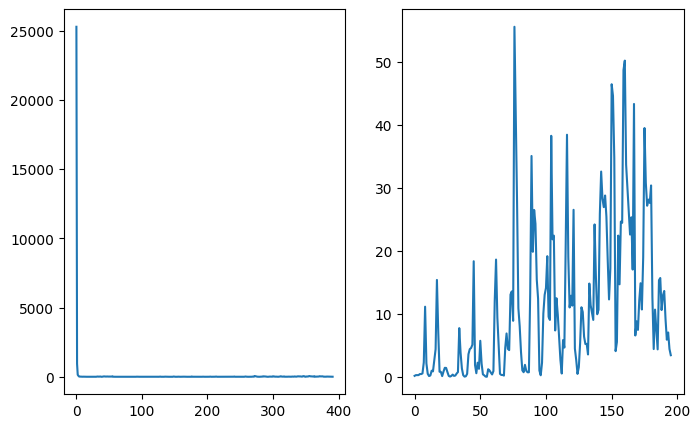

In [235]:
# Plot the training history:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize = (8,5))
ax[0].plot(full_history.history["loss"])
ax[1].plot(full_history.history["loss"][-len(full_history.history["loss"])//2:])

In [232]:
model.predict(x_train)[:5]

2459/2459 ━━━━━━━━━━━━━━━━━━━━ 3s 969us/step


array([[248.89058],
       [246.61288],
       [248.60332],
       [250.10327],
       [247.44875]], dtype=float32)

In [241]:
# Save FINAL model weights and history data.
weights_path = "../data/processed/model_weights/xbatcher_test1.weights.h5"
model.save_weights(weights_path)

In [240]:
import pickle
history_path = "../data/processed/model_weights/xbatcher_test1.json"

with open(history_path, "wb") as file:
    pickle.dump(full_history, file)

In [242]:
# Open and load later with 
model.load_weights(weights_path)

with open(history_path, 'rb') as file:
    history = pickle.load(file)


(0.0, 5.0)

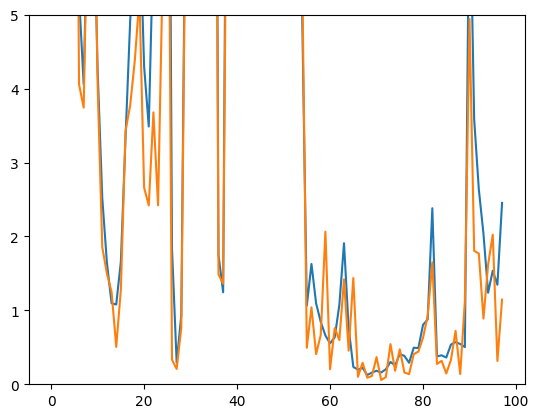

In [256]:
plt.plot(history.history["loss"][2:100])
plt.plot(history.history["val_loss"][2:100])
plt.ylim((0,5))